**Семенов Вячеслав Андреевич, ИУ5-63Б, Вариант 13**

Исходной датасет не подходил под условия задачи, использовал датасет из интернета, содержащий пропуски.

Задача №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
# Первые 5 строк датасета
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 891


In [5]:
data.shape

(891, 12)

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Проверим количество пропусков в датасете

In [7]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [8]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Age. Тип данных float64. Количество пустых значений 177, 19.87%.


In [9]:
data_num = data[num_cols]
data_num

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


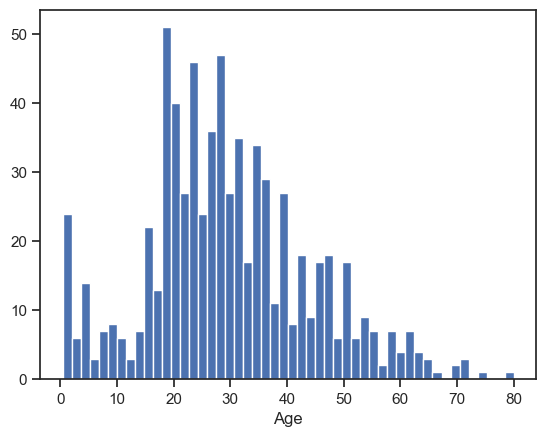

In [10]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Исходя из гистограммы, заполним пропуски модой.

In [11]:
Age = data_num[['Age']]
Age.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [12]:
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(Age)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [13]:
strategies=['mean', 'median', 'most_frequent']

In [14]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(Age)
    return data_num_imp[mask_missing_values_only]

In [15]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 

In [16]:
    temp_data = data[['Age']]
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    imp_num = SimpleImputer(strategy=strategies[2])
    data_num_imp = imp_num.fit_transform(temp_data)
    filled_data = data_num_imp[mask_missing_values_only]
    data[['Age']] = data_num_imp

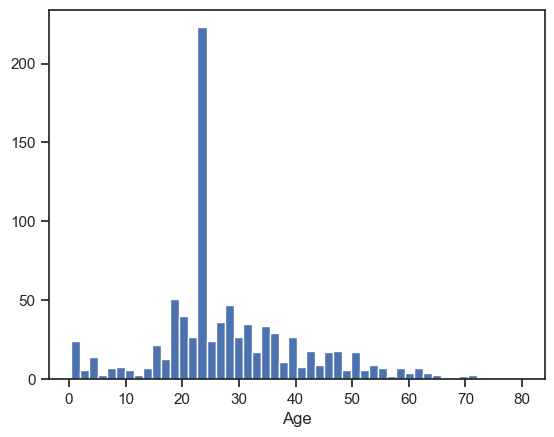

In [17]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Для студентов групп ИУ5-63Б, ИУ5Ц-83Б - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

<Axes: xlabel='Age'>

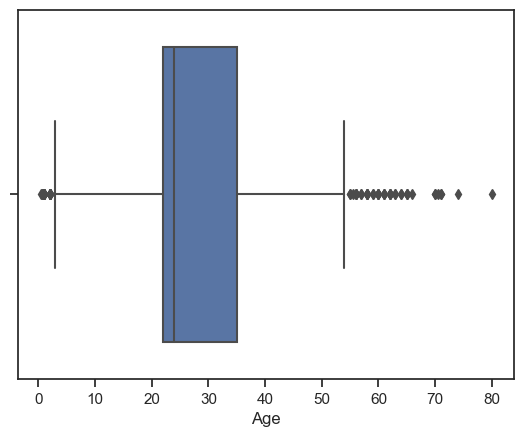

In [18]:
sns.boxplot(x=data["Age"])

In [19]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Cabin. Тип данных object. Количество пустых значений 687, 77.1%.
Колонка Embarked. Тип данных object. Количество пустых значений 2, 0.22%.


<Axes: >

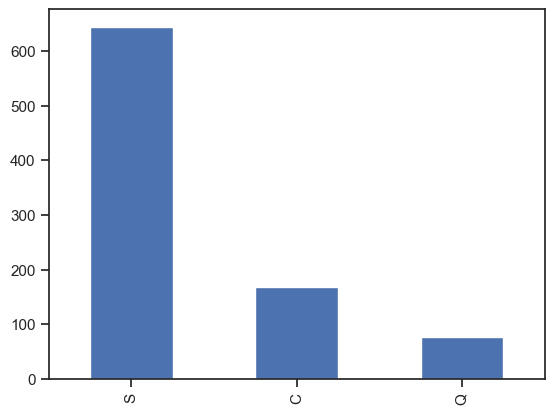

In [20]:
Embarked = data['Embarked'].value_counts().head(7)
Embarked.plot.bar()

In [21]:
from sklearn.impute import SimpleImputer
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[['Embarked']] = imp2.fit_transform(data[['Embarked']])

<Axes: >

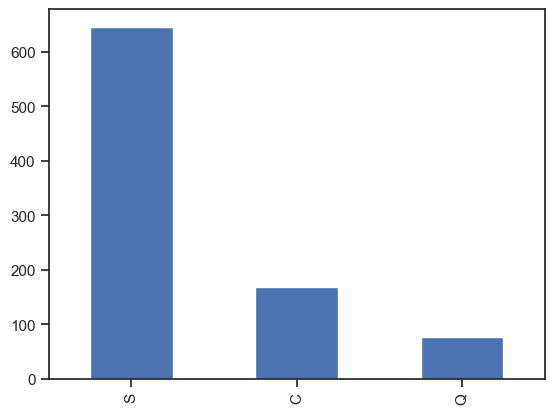

In [22]:
Embarked = data['Embarked'].value_counts().head(7)
Embarked.plot.bar()

Заполнили категориальный признак "Embarked", используя заполнение модой, на графиках видно, что существенных изменений после заполнения не произошло, значит метод выбран верно.